In [40]:
import pandas as pd

def cleanup_sensor(df_step: pd.DataFrame):
    """
    Removes unused Columns and Calculates the Electron count. Returns a new Dataframe with the Electron count.
    """
    length = 32
    if ('Integral_Avg_Flux_47' in df_step.columns):
        length = 48
    df_step_electron = pd.DataFrame(columns = [], index = df_step.index)
    zipped_columns = [(f'Electron_Avg_Flux_{i}', f"Integral_Avg_Flux_{i}", f"Magnet_Avg_Flux_{i}") for i in range(length)]

    for electron_col, integral_col, magnet_col in zipped_columns:
        df_step_electron[electron_col] = df_step[integral_col] - df_step[magnet_col]

    return df_step_electron

In [41]:
import epd
import stix
import misc
import config
import numpy as np

START_DATE, END_DATE = "2021-05-21", "2021-05-24"
#START_DATE, END_DATE = "2023-01-09", "2023-01-12"
sigma_factor = 2.5

_parker_dist_series = pd.read_pickle(f"{config.CACHE_DIR}/SolarMACH/parker_spiral_distance.pkl")
parker_dist_series = _parker_dist_series['Parker_Spiral_Distance']

stix_flares = stix.read_list()

dates = pd.to_datetime(stix_flares['peak_UTC'])
mask = (pd.Timestamp(START_DATE) <= dates) & (dates < pd.Timestamp(END_DATE) + pd.Timedelta(days=1))
flare_range = stix_flares[mask]

# Making sure the flare time is suntime
AU_TO_M = 149597870700
SPEED = 299_792_458 # m/s
time_difference = pd.to_timedelta((flare_range["solo_position_AU_distance"] * AU_TO_M) / SPEED, unit="s")

flare_range["_date_start"] = pd.to_datetime(stix_flares['start_UTC']).dt.floor("60s") - time_difference
flare_range["_date_peak"] = pd.to_datetime(stix_flares['peak_UTC']).dt.floor("60s") - time_difference
flare_range["_date_end"] = pd.to_datetime(stix_flares['end_UTC']).dt.floor("60s")- time_difference


df = epd.load_pickles("ept", str(START_DATE), str(END_DATE), viewing="sun")
df_sensor = df
#df_sensor = cleanup_sensor(df)
running_mean, running_std = epd.running_average(df_sensor, 18)
running_mean


C:\Users\louis.bischof\AppData\Local\Temp\ipykernel_37680\2129235277.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flare_range["_date_start"] = pd.to_datetime(stix_flares['start_UTC']).dt.floor("60s") - time_difference
C:\Users\louis.bischof\AppData\Local\Temp\ipykernel_37680\2129235277.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flare_range["_date_peak"] = pd.to_datetime(stix_flares['peak_UTC']).dt.floor("60s") - time_difference
C:\Users\louis.bischof\AppData\Local\Temp\ipykernel_37680\2129

,Electron_Flux_0,Electron_Flux_1,Electron_Flux_2,Electron_Flux_3,Electron_Flux_4,Electron_Flux_5,Electron_Flux_6,Electron_Flux_7,Electron_Flux_8,Electron_Flux_9,...,Electron_Flux_24,Electron_Flux_25,Electron_Flux_26,Electron_Flux_27,Electron_Flux_28,Electron_Flux_29,Electron_Flux_30,Electron_Flux_31,Electron_Flux_32,Electron_Flux_33
2021-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-21 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 23:35:00,0.0,317183.784288,264197.064996,190006.402344,155419.570312,162797.202257,102770.911024,72198.079861,73797.954536,62073.818414,...,4086.893066,2272.588053,1591.113566,2039.965508,1656.613620,1364.876383,1635.082709,1772.511244,1178.022773,1445.278402
2021-05-24 23:40:00,0.0,300917.949219,260915.113607,199275.007378,158194.919271,158760.907986,98779.807726,74123.361979,73797.954536,59882.977810,...,3759.941678,2272.588053,1591.113566,2039.965508,1529.181803,1240.796712,1509.307115,1772.511244,1346.311740,1445.278402
2021-05-24 23:45:00,0.0,313117.325087,264197.064996,197730.240017,156807.244792,156070.045139,98779.807726,75086.003038,74558.758138,60613.257975,...,3432.990207,2434.915771,1591.113566,1657.471965,1529.181803,1240.796712,1635.082709,1772.511244,1178.022773,1445.278402
2021-05-24 23:50:00,0.0,304984.407552,246146.333659,199275.007378,158194.919271,153379.182292,95786.480252,77973.926215,78362.776367,60613.257975,...,3269.514486,2272.588053,1591.113566,1529.974121,1529.181803,1364.876383,1635.082709,1920.220513,1346.311740,1445.278402


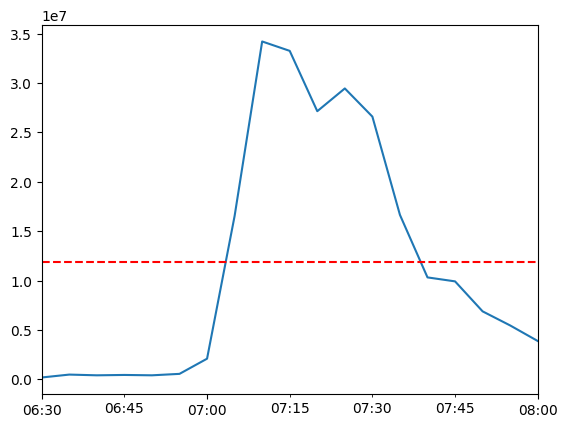

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import tqdm

columns =  df_sensor.columns
column = columns[1]

threshold = running_mean + sigma_factor * running_std
selected = df_sensor > threshold

# If mean is zero, we want to ignore it
selected &= (running_mean != 0) # Bitwise and

# If we have a nan we also want to ignore it
nan_mask = df_sensor.isna() | running_mean.isna() | running_std.isna() # Bitwise OR
selected &= ~nan_mask

# Implementing the idea described here for effecient detection of events: 
# https://joshdevlin.com/blog/calculate-streaks-in-pandas/

diff = (selected != selected.shift()) & ~selected.shift().isna()




In [ ]:
indexed = diff.cumsum()
streaks = selected * indexed
streaks = streaks[streaks != 0]
streaks["Index"] = streaks.index

event_starts = []
event_ends = []


for i, column in enumerate(columns):
    time_corrected = streaks["Index"]
    group = time_corrected.groupby(streaks[column])

    # Remove singular events
    mask = group.count().reset_index(drop=True) > 1

    # Getting the Event Starts
    min_group = group.min().reset_index(drop=True)[mask]

    # And Ends
    max_group = group.max().reset_index(drop=True)[mask]


    channel_event = pd.Series(min_group)
    event_starts.append(channel_event)

    event_ends.append(pd.Series(max_group))


# Fully parallize the computation of the events and only loop over the flares
df_starts = pd.DataFrame(event_starts, index=columns).T
df_ends = pd.DataFrame(event_ends, index=columns).T
step_speeds = misc.misc_handler.compute_particle_speed(34, "electron")
for flare_index in flare_range.index:
    arrive_time = pd.to_timedelta(_parker_dist_series['Parker_Spiral_Distance'][flare_index] / step_speeds, unit="s")
    
    low = flare_range["_date_start"][flare_index] + arrive_time
    high = flare_range["_date_end"][flare_index] + arrive_time * 1.5

    mask = low < df_starts
    mask &= df_starts < high

    flare_range.loc[flare_index, "channels"] = mask.any().sum()


df_sensor.plot(y="Electron_Flux_1", logy=True)

events = pd.concat({"Start": df_starts, "End": df_ends}, axis=1)
events[:]["Electron_Flux_1"]